(ctrperplatformexamples)=
## Uncertainty of unique clicks rate in searches per platforms

We cand distinguish between AndroidApp and ResponsiveWeb

We want to compare the performance os the search per different platform.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
%matplotlib inline

### Preparing the dataset

In [2]:
searches = pd.read_csv("../../../bayesian-course/datasets-toys/datasets/daily_click_to_rate_per_searches_type.csv")
searches['uctr'] = searches['searches_with_click'] /searches['searches']

In [3]:
data = searches
data.head()

,date,product_type,searches_with_click,searches,uctr
0,2021-03-20,ResponsiveWeb,61580,245610,0.250723
1,2021-03-16,ResponsiveWeb,81100,313855,0.258400
2,2021-03-04,ResponsiveWeb,79186,301383,0.262742
3,2021-03-28,ResponsiveWeb,60446,240492,0.251343
4,2021-04-19,AndroidApp,22212,47712,0.465543


For every day we know:

- $\theta$ is the probability that one search has one click (this is following a Benoulli($\theta$)
- Random variable $X$ which represnets number of searches with clicks during a day follows a binomial distributions $B(n,\theta)$ where $n$ is the number of total daily searches and $\theta$ is the probability that one search has one click . Then, the unique CTR (uctr) is the expected value of this distribution:

$$
E(X) = \theta = uctr
$$

We want to create a model for the daily unique click rate (uctr) using bayesian statistics.

Bayesian Inference has three steps.

Step 1. [Prior] Choose a PDF to model your parameter $\theta$, aka the prior distribution P($\theta$). This is your best guess about parameters before seeing the data X.

Step 2. [Likelihood] Choose a PDF for P(X|$\theta$). Basically you are modeling how the data X will look like given the parameter $\theta$.

Step 3. [Posterior] Calculate the posterior distribution P($\theta$|X) and pick the $\theta$ that has the highest P($\theta$|X).
And the posterior becomes the new prior. Repeat step 3 as you get more data.


We are going to do the below process per every platform and plot credible intervals over time!

In [4]:
data.head()

,date,product_type,searches_with_click,searches,uctr
0,2021-03-20,ResponsiveWeb,61580,245610,0.250723
1,2021-03-16,ResponsiveWeb,81100,313855,0.258400
2,2021-03-04,ResponsiveWeb,79186,301383,0.262742
3,2021-03-28,ResponsiveWeb,60446,240492,0.251343
4,2021-04-19,AndroidApp,22212,47712,0.465543


### We are going to ompute the credible interval for every day and platform and plot

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def credible_intervale(dt,df,a,b,platform):
    data_dt = df[(df['date']==dt) & (df['product_type']==platform)].copy().reset_index()
    k = data_dt['searches_with_click']
    n = data_dt['searches']
    cl,cu = stats.beta.ppf(0.025,a+k,b+n-k)[0],stats.beta.ppf(0.975,a+k,b+n-k)[0]
    return cl,cu,data_dt['uctr'][0]

In [6]:
a=1
b=1
dic_web = {}
for dt in data['date']:
    cl,cu,uctr = credible_intervale(dt,data,a,b,"ResponsiveWeb")
    dic_web[dt] = cl,cu,uctr

In [7]:
a=1
b=1
dic_android = {}
for dt in data['date']:
    cl,cu,uctr = credible_intervale(dt,data,a,b,"AndroidApp")
    dic_android[dt] = cl,cu,uctr

In [8]:
resultWeb = pd.DataFrame.from_dict(dic_web).transpose().sort_index()
resultWeb.columns = ["lower",'upper','uctr']
resultWeb

,lower,upper,uctr
2021-03-01,0.254502,0.258264,0.256379
2021-03-02,0.260568,0.263611,0.262086
2021-03-03,0.258571,0.261631,0.260098
2021-03-04,0.261174,0.264316,0.262742
2021-03-05,0.257308,0.260512,0.258907
2021-03-06,0.251458,0.254874,0.253162
2021-03-07,0.253416,0.256799,0.255104
2021-03-08,0.258160,0.261284,0.259719
2021-03-09,0.259979,0.263071,0.261522
2021-03-10,0.257498,0.260605,0.259048


In [9]:
resultAnd = pd.DataFrame.from_dict(dic_android).transpose().sort_index()
resultAnd.columns = ["lower",'upper','uctr']
resultAnd

,lower,upper,uctr
2021-03-01,0.537630,0.545246,0.541440
2021-03-02,0.546614,0.552474,0.549545
2021-03-03,0.548207,0.554073,0.551142
2021-03-04,0.546926,0.552832,0.549881
2021-03-05,0.541109,0.547127,0.544120
2021-03-06,0.543137,0.549293,0.546217
2021-03-07,0.545604,0.551536,0.548572
2021-03-08,0.545509,0.551424,0.548468
2021-03-09,0.546782,0.552701,0.549743
2021-03-10,0.546524,0.552432,0.549480


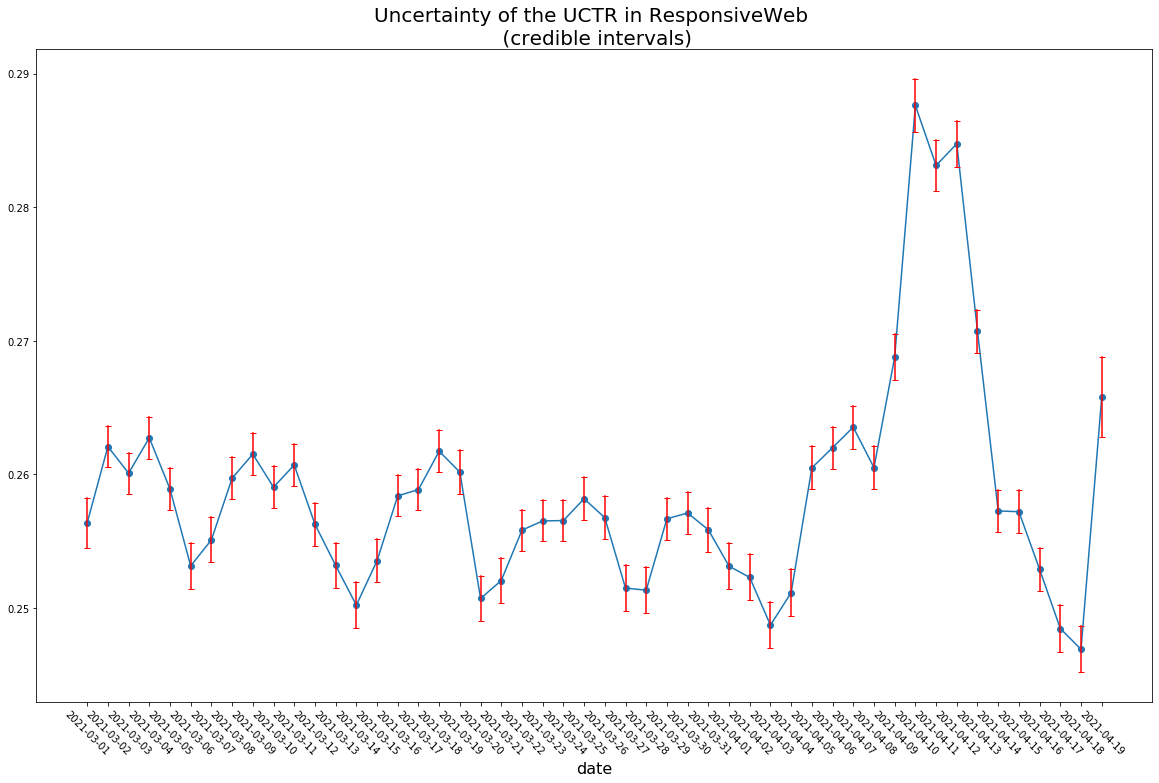

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(resultWeb.index, resultWeb['uctr'],marker='o')
for lower,upper,y in zip(resultWeb['lower'],resultWeb['upper'],range(resultWeb.shape[0])):
    plt.plot((y,y),(lower,upper),'r_-',color='red')
plt.xticks(range(resultWeb.shape[0]),list(resultWeb.index))
plt.title('Uncertainty of the UCTR in ResponsiveWeb \n (credible intervals)' , fontsize=20)
# Add X and y Label
_ = plt.xlabel("date", fontsize=16)
_ = plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45 ) 

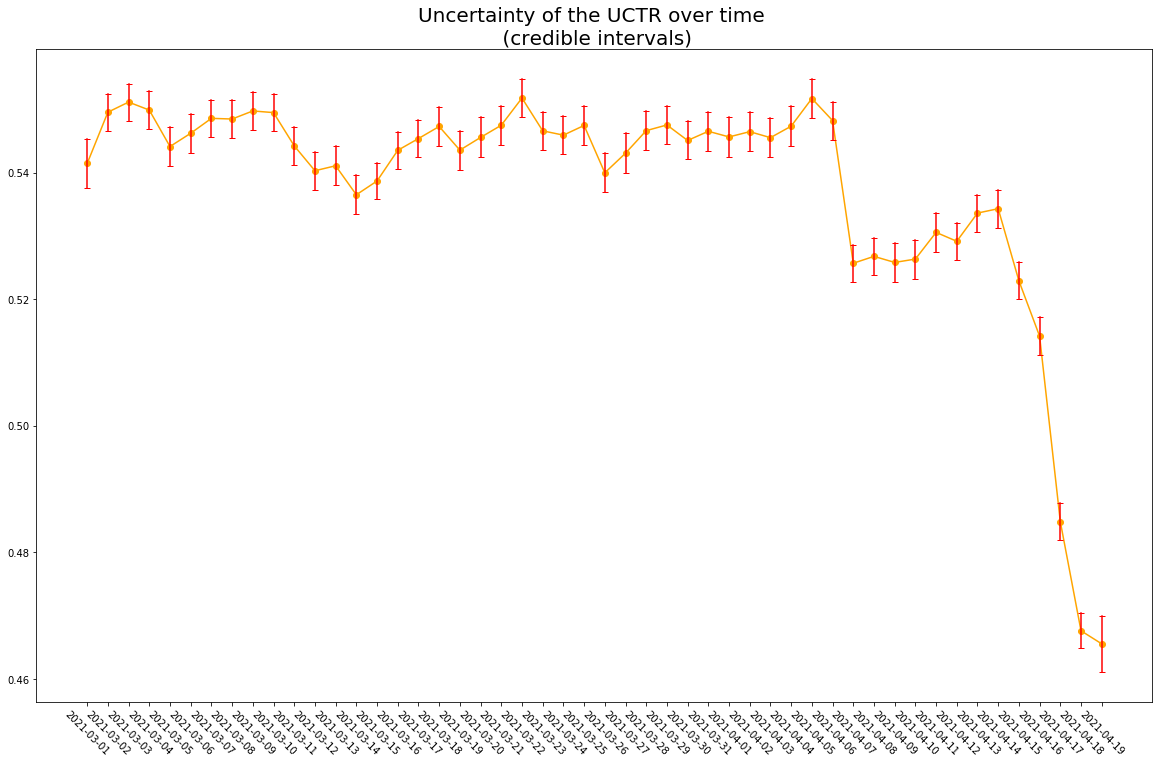

In [11]:
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(resultAnd.index, resultAnd['uctr'],marker='o',color='orange')
for lower,upper,y in zip(resultAnd['lower'],resultAnd['upper'],range(resultAnd.shape[0])):
    plt.plot((y,y),(lower,upper),'g_-',color='red')
plt.xticks(range(resultAnd.shape[0]),list(resultAnd.index))
plt.title('Uncertainty of the UCTR over time \n (credible intervals)' , fontsize=20)
_ = plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45 ) 
# Add X and y Label

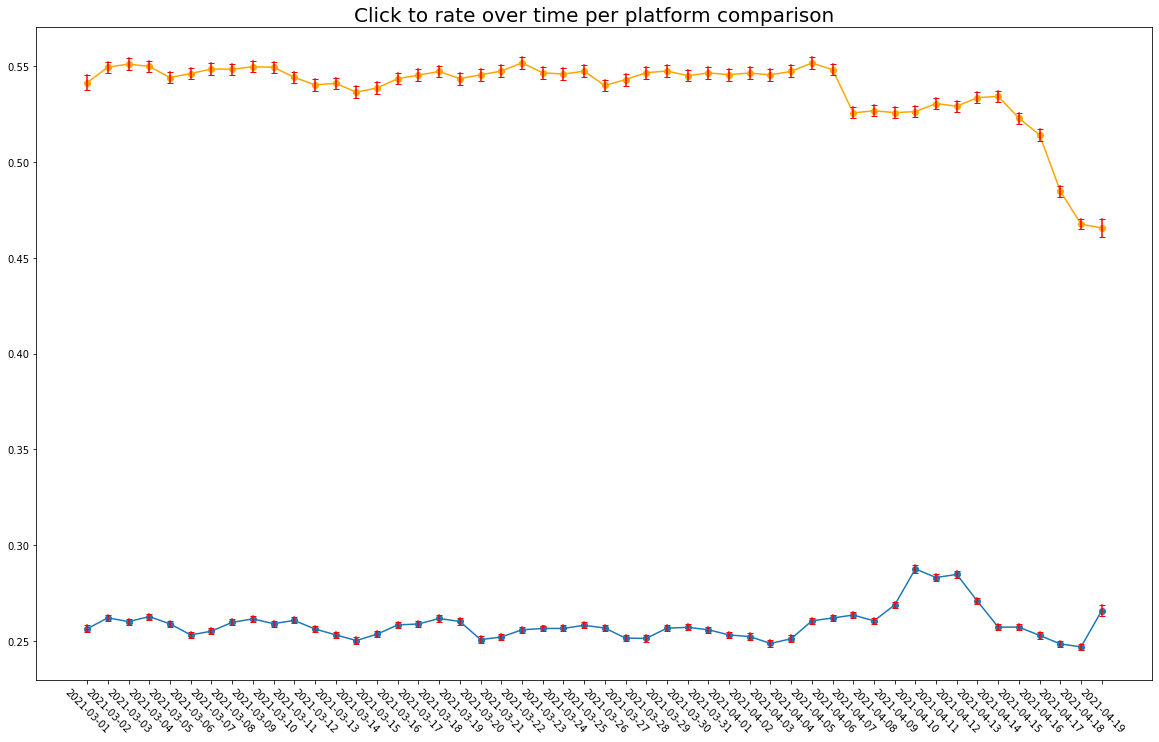

In [12]:
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(resultWeb.index, resultWeb['uctr'],marker='o')
for lower,upper,y in zip(resultWeb['lower'],resultWeb['upper'],range(resultWeb.shape[0])):
    plt.plot((y,y),(lower,upper),'r_-',color='red')
plt.xticks(range(resultWeb.shape[0]),list(resultWeb.index))
plt.plot(resultAnd.index, resultAnd['uctr'],marker='o',color='orange')
for lower,upper,y in zip(resultAnd['lower'],resultAnd['upper'],range(resultAnd.shape[0])):
    plt.plot((y,y),(lower,upper),'g_-',color='red')
plt.xticks(range(resultAnd.shape[0]),list(resultAnd.index))
plt.title('Click to rate over time per platform comparison' , fontsize=20)
_ = plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45 ) 
# Add X and y Label